<a href="https://colab.research.google.com/github/aditi-123459/-Unveiling-the-Android-App-Market/blob/main/Unveiling_the_Android_App_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob


In [ ]:
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")


In [ ]:
apps.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
apps.shape
apps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [ ]:
reviews.shape
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72964 entries, 0 to 72963
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72964 non-null  object 
 1   Translated_Review       43092 non-null  object 
 2   Sentiment               43098 non-null  object 
 3   Sentiment_Polarity      43098 non-null  float64
 4   Sentiment_Subjectivity  43097 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.8+ MB


In [ ]:
apps.drop_duplicates(subset='App', inplace=True)


In [ ]:
apps.isnull().sum()


,0
Unnamed: 0,0
App,0
Category,0
Rating,1463
Reviews,0
Size,1227
Installs,0
Type,0
Price,0
Content Rating,0


In [ ]:
apps['Rating'].fillna(apps['Rating'].median(), inplace=True)
apps['Type'].fillna('Free', inplace=True)
apps.dropna(subset=['Category'], inplace=True)


/tmp/ipython-input-1445170305.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Rating'].fillna(apps['Rating'].median(), inplace=True)
/tmp/ipython-input-1445170305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
apps['Installs'] = apps['Installs'].str.replace(',', '')
apps['Installs'] = apps['Installs'].str.replace('+', '')
apps['Installs'] = apps['Installs'].astype(int)


In [ ]:
apps['Price'] = apps['Price'].str.replace('$', '')
apps['Price'] = apps['Price'].astype(float)


In [ ]:
apps['Size'] = apps['Size'].astype(str)
apps['Size'] = apps['Size'].str.replace('M', '')
apps['Size'] = apps['Size'].str.replace('k', '')
apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')

In [ ]:
category_count = apps['Category'].value_counts()
category_count.head()


,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


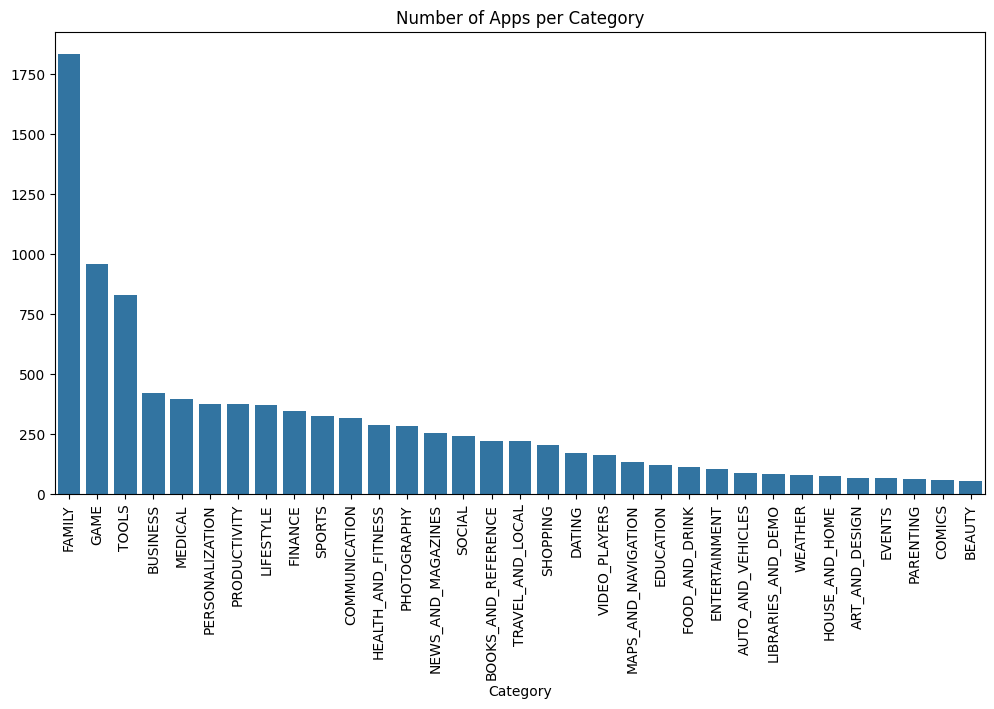

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=category_count.index, y=category_count.values)
plt.xticks(rotation=90)
plt.title("Number of Apps per Category")
plt.show()


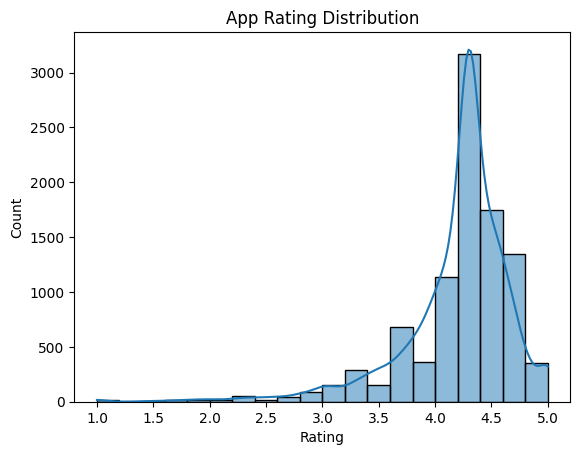

In [ ]:
sns.histplot(apps['Rating'], bins=20, kde=True)
plt.title("App Rating Distribution")
plt.show()


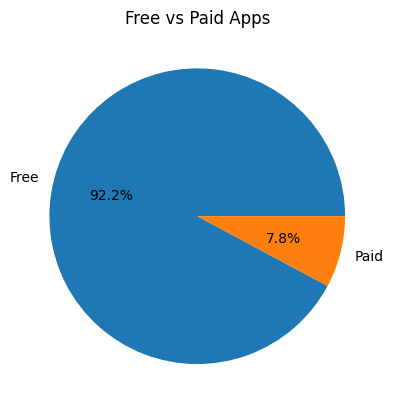

In [ ]:
apps['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.show()


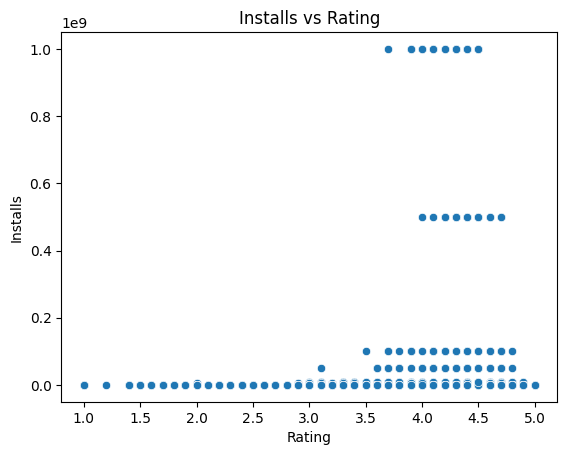

In [ ]:
sns.scatterplot(x='Rating', y='Installs', data=apps)
plt.title("Installs vs Rating")
plt.show()


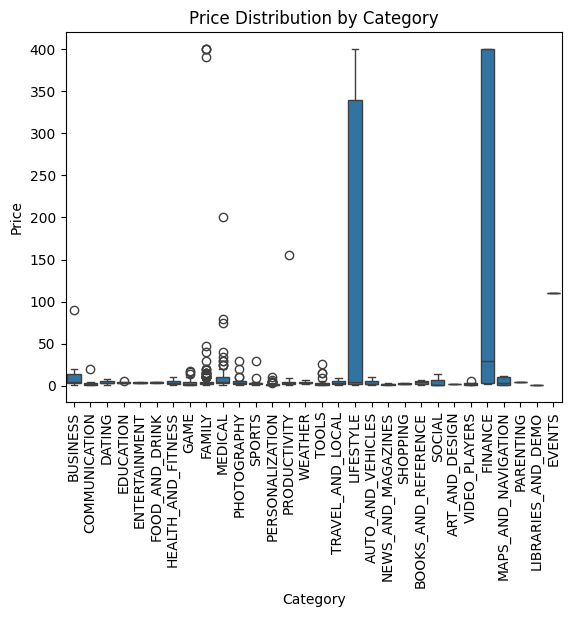

In [ ]:
paid_apps = apps[apps['Type'] == 'Paid']

sns.boxplot(x='Category', y='Price', data=paid_apps)
plt.xticks(rotation=90)
plt.title("Price Distribution by Category")
plt.show()


In [ ]:
reviews.dropna(subset=['Translated_Review'], inplace=True)


In [ ]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


In [ ]:
reviews['Sentiment_Score'] = reviews['Translated_Review'].apply(get_sentiment)


In [ ]:
def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

reviews['Sentiment'] = reviews['Sentiment_Score'].apply(sentiment_label)


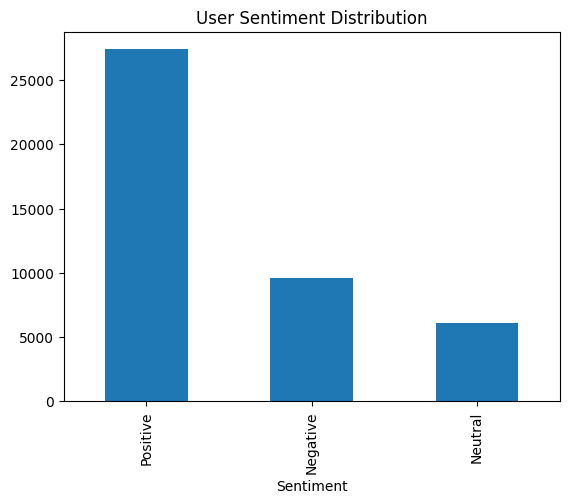

In [ ]:
reviews['Sentiment'].value_counts().plot(kind='bar')
plt.title("User Sentiment Distribution")
plt.show()


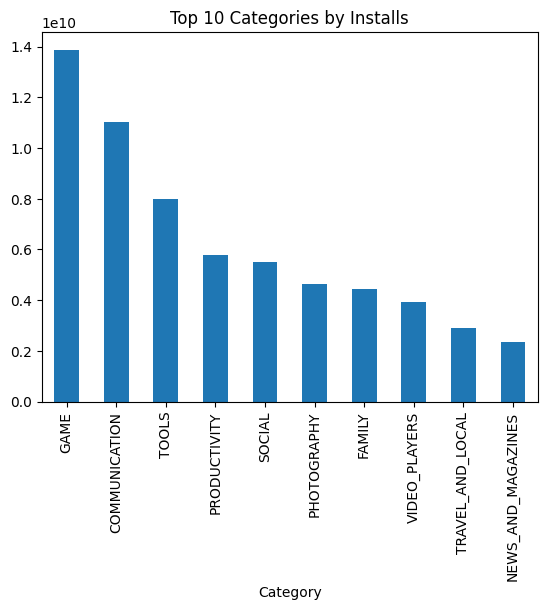

In [ ]:
top_installs = apps.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

top_installs.plot(kind='bar')
plt.title("Top 10 Categories by Installs")
plt.show()
